In [1]:
# %config InlineBackend.figure_formats = ['svg']

In [2]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split


In [3]:
import seaborn_figure_settings

In [4]:
save_dpath = os.path.join('../notebooks/figures/', 'reruns')
os.makedirs(save_dpath,exist_ok=True)

In [5]:
from matplotlib.colors import  ListedColormap
import matplotlib.ticker as mtick

In [6]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral',   'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [7]:
morder = ['MIXOTROPH', 'OVERFLOW', 'EXOENZYME',  'ROS',]
media_order = ['lowN', 'pro99']
mpalette = [ '#84dcc6', '#426b69', '#9b7874', '#b191ff', ]
#mpalette = sns.color_palette(mpalette)
#morder = [morder[1]] + morder[3:]
#mpalette = [mpalette[1]] + mpalette[3:]
sns.color_palette(mpalette)

[(0.5176470588235295, 0.8627450980392157, 0.7764705882352941),
 (0.25882352941176473, 0.4196078431372549, 0.4117647058823529),
 (0.6078431372549019, 0.47058823529411764, 0.4549019607843137),
 (0.6941176470588235, 0.5686274509803921, 1.0)]

In [8]:
vorder1 = ['Versatile VPRO', 'Positive VPRO', 'Negative VPRO',  ]
vorder1 = ['Versatile VPRO','Non-Versatile VPRO',  ]
vorder1_labels = ['Versatile vPro','Non-Versatile vPro',  ]

vpalette1 = [gpalette[1], gpalette[0], gpalette[3], gpalette[4], ]
vpalette1 = ['#5e392f', gpalette[1], gpalette[3],  ]
vpalette1 = [
    '#5E392F', 
    #'#DC267F',
    #'#FE6100',
    '#648FFF',
    #'#785EF0',
]
print (vorder1)
sns.color_palette(vpalette1)

['Versatile VPRO', 'Non-Versatile VPRO']


[(0.3686274509803922, 0.2235294117647059, 0.1843137254901961),
 (0.39215686274509803, 0.5607843137254902, 1.0)]

In [9]:
cmap = {
    'Original' : 'Original\nvPro: 12.5 fg N/cell', 
    'rerun_het_BP05' : 'vPro: 7 fg N/cell', 
    'rerun_het_BP14' : 'vPro: 20 fg N/cell', 
    'rerun_het_CP13' : 'vPro init C:N: 8',
    'rerun_het_DIN800' : 'DIN=800 µM N', 
    'rerun_het_DOC160' : 'DOC=160 µM C',
}
corder = ['Original\nvPro: 12.5 fg N/cell', 'vPro: 7 fg N/cell',
       'vPro: 20 fg N/cell', 'vPro init C:N: 8', 'DIN=800 µM N',
       'DOC=160 µM C']
#count_init_df.Category.unique()


In [10]:
morder

['MIXOTROPH', 'OVERFLOW', 'EXOENZYME', 'ROS']

In [23]:
import os
import glob
dpath = '../results/rerun_sensitivity_init/clean'
dpath2 = '../results/final/het/'

#glob.glob(os.path.join(dpath, 'versatile_vpros_*'))

In [57]:
orig_vpro_df = pd.read_csv('../results/final/het/versatile_vpros_monte_het_clean.csv')
orig_vpro_df['Category'] = 'Original'

In [58]:
shading_vpro_df = pd.read_csv('../results/rerun_sensitivity/clean_shading/clean_shading/versatile_vpros_monte_het_clean_clean.csv')
shading_vpro_df['Category'] = 'Shading'

In [59]:
def _readvfile(fname):
    category = fname.replace('../results/rerun_sensitivity_init/clean/versatile_vpros_rerun_het_','').replace('_init.csv','')
    print (fname, category)
    df = pd.read_csv(fname)
    df['Category'] = category
    return df
vpro_df = pd.concat([_readvfile(f) for f in glob.glob(os.path.join(dpath, 'versatile_vpros_*'))], ignore_index=True)


../results/rerun_sensitivity_init/clean/versatile_vpros_rerun_het_DOC160_init.csv DOC160
../results/rerun_sensitivity_init/clean/versatile_vpros_rerun_het_BP05_init.csv BP05
../results/rerun_sensitivity_init/clean/versatile_vpros_rerun_het_DOC2500_init.csv DOC2500
../results/rerun_sensitivity_init/clean/versatile_vpros_rerun_het_DIN800DOC160_init.csv DIN800DOC160
../results/rerun_sensitivity_init/clean/versatile_vpros_rerun_het_BP14_init.csv BP14
../results/rerun_sensitivity_init/clean/versatile_vpros_rerun_het_DIN800_init.csv DIN800
../results/rerun_sensitivity_init/clean/versatile_vpros_rerun_het_DIN800DOC2500_init.csv DIN800DOC2500
../results/rerun_sensitivity_init/clean/versatile_vpros_rerun_het_CP13_init.csv CP13


In [60]:
vpro_df = pd.concat([vpro_df, orig_vpro_df, shading_vpro_df], ignore_index=True).copy()

In [61]:
vpro_df.VPRO.value_counts()

VPRO
vpro_11_62_EXOENZYME_C1    10
vpro_12_88_EXOENZYME_C2    10
vpro_2_22_51_OVERFLOW      10
vpro_2_23_61_OVERFLOW      10
vpro_2_23_78_OVERFLOW      10
                           ..
vpro_64_97_MIN_C1          10
vpro_71_74_MIN_C2          10
vpro_75_4_MIN_C1           10
vpro_76_72_MIN_C1          10
vpro_97_23_ROS_C1          10
Name: count, Length: 208, dtype: int64

In [62]:
vpro_df

,model,VPRO,Inhibited,Neutral,Other,Strong,Sustained,Weak,pos_interaction,neg_interaction,Versatile,Category
0,EXOENZYME,vpro_11_62_EXOENZYME_C1,0.0,19,6,0,62,79,62,79,True,DOC160
1,EXOENZYME,vpro_12_88_EXOENZYME_C2,0.0,12,0,0,0,38,0,38,False,DOC160
2,EXOENZYME,vpro_13_4_EXOENZYME_C3,0.0,100,2,0,0,0,0,0,False,DOC160
3,EXOENZYME,vpro_13_69_EXOENZYME_C1,3.0,91,0,0,77,14,77,17,True,DOC160
4,EXOENZYME,vpro_17_89_EXOENZYME_C2,0.0,0,0,0,0,46,0,46,False,DOC160
...,...,...,...,...,...,...,...,...,...,...,...,...
2075,ROS,vpro_89_60_ROS_C2,0.0,2,0,0,51,2,51,2,True,Shading
2076,ROS,vpro_90_89_ROS_C0,0.0,0,11,0,119,47,119,47,True,Shading
2077,ROS,vpro_93_82_ROS_C1,0.0,47,0,0,8,0,8,0,False,Shading
2078,ROS,vpro_96_60_ROS_C1,0.0,0,0,0,58,8,58,8,True,Shading


In [63]:
vpro_df['Versatile_STR'] = vpro_df.Versatile.map({True: 'Versatile VPRO',False: 'Non-Versatile VPRO',  })
#vpro_df.loc[vpro_df.pos_interaction.ge(1) & ~vpro_df.neg_interaction.ge(1), 'Versatile_STR'] = 'Positive VPRO'
#vpro_df.loc[~vpro_df.pos_interaction.ge(1) & vpro_df.neg_interaction.ge(1), 'Versatile_STR'] = 'Negative VPRO'
#vpro_df.loc[~vpro_df.pos_interaction.ge(1) & ~vpro_df.neg_interaction.ge(1), 'Versatile_STR'] = 'Negative VPRO'



In [64]:
vpro_df['Category'].unique()

array(['DOC160', 'BP05', 'DOC2500', 'DIN800DOC160', 'BP14', 'DIN800',
       'DIN800DOC2500', 'CP13', 'Original', 'Shading'], dtype=object)

In [102]:
sensitivity_map = {
    'Original' : 'Original\nvPro: 12.5 fg N/cell', 
    'BP05' : 'vPro: 7 fg N/cell', 
    'BP14' : 'vPro: 20 fg N/cell', 
    'CP13' : 'vPro Initial C:N: 8',
    'Shading' : 'Shading Correction',
}
vpro_df['Sensitivity'] = vpro_df['Category'].map(sensitivity_map)

sensitivity_order = [
    'Original\nvPro: 12.5 fg N/cell', 
    'vPro: 7 fg N/cell', 
    'vPro: 20 fg N/cell', 
    'vPro Initial C:N: 8',
    'Shading Correction',
]


In [145]:
#sensitivity_order = ['Original', 'BP05', 'BP14', 'CP13', 'Shading']
media_order = ['Original', 'DOC160', 'DOC2500', 'DIN800DOC160',  'DIN800', 'DIN800DOC2500',  ]

In [104]:
DEFAULT_DOC = 20
DEFAULT_DIN = 100
docmap ={
    'Original' : DEFAULT_DOC,
    'DOC160' : 160,
    'DOC2500' : 2500, 
    'DIN800DOC160' : 160,  
    'DIN800' : DEFAULT_DOC, 
    'DIN800DOC2500' : 2500,
}
dinmap ={
    'Original' : DEFAULT_DIN,    
    'DOC160' : DEFAULT_DIN,
    'DOC2500' : DEFAULT_DIN, 
    'DIN800DOC160' : 800,  
    'DIN800' : 800, 
    'DIN800DOC2500' :800,
}


In [105]:
#vpro_df['Category'] = vpro_df.category.map(cmap)
vpro_df['DOC'] = vpro_df['Category'].map(docmap)
vpro_df['DIN'] = vpro_df['Category'].map(dinmap)

In [106]:
id_vars= ['Category', 'model', 'DIN', 'DOC', 'Sensitivity']

In [107]:
vorder = ['Versatile VPRO','Non-Versatile VPRO',  ]
vpalette = [ '#FF8E8F', '#9c110b']
vpalette = [ 'black', '#9c110b']

sns.color_palette(vpalette)

[(0.0, 0.0, 0.0),
 (0.611764705882353, 0.06666666666666667, 0.043137254901960784)]

In [108]:
vpro_df = vpro_df.loc[vpro_df.model.isin(morder)].copy()

In [109]:
count_df = vpro_df.groupby(id_vars, dropna=False)[gorder].sum().reset_index()

count_df

,Category,model,DIN,DOC,Sensitivity,Strong,Sustained,Inhibited,Weak,Neutral,Other
0,BP05,EXOENZYME,NaN,NaN,vPro: 7 fg N/cell,34,1827,46.0,658,3108,560
1,BP05,MIXOTROPH,NaN,NaN,vPro: 7 fg N/cell,0,0,164.0,978,1234,0
2,BP05,OVERFLOW,NaN,NaN,vPro: 7 fg N/cell,3,212,315.0,1010,3251,102
3,BP05,ROS,NaN,NaN,vPro: 7 fg N/cell,196,28,19.0,1252,569,141
4,BP14,EXOENZYME,NaN,NaN,vPro: 20 fg N/cell,113,1552,0.0,1284,2113,1246
5,BP14,MIXOTROPH,NaN,NaN,vPro: 20 fg N/cell,0,0,0.0,1520,854,0
6,BP14,OVERFLOW,NaN,NaN,vPro: 20 fg N/cell,7,152,0.0,2502,1973,251
7,BP14,ROS,NaN,NaN,vPro: 20 fg N/cell,181,0,0.0,1673,157,192
8,CP13,EXOENZYME,NaN,NaN,vPro Initial C:N: 8,59,1691,0.0,1027,2587,942
9,CP13,MIXOTROPH,NaN,NaN,vPro Initial C:N: 8,0,0,0.0,1348,1036,0


In [110]:
count_ver_df = vpro_df.loc[vpro_df.Versatile].groupby(id_vars, dropna=False)[gorder].sum().reset_index()
count_ver_df



,Category,model,DIN,DOC,Sensitivity,Strong,Sustained,Inhibited,Weak,Neutral,Other
0,BP05,EXOENZYME,NaN,NaN,vPro: 7 fg N/cell,0,1072,46.0,353,1160,282
1,BP05,OVERFLOW,NaN,NaN,vPro: 7 fg N/cell,2,185,149.0,518,1520,57
2,BP14,EXOENZYME,NaN,NaN,vPro: 20 fg N/cell,76,1304,0.0,795,908,917
3,BP14,OVERFLOW,NaN,NaN,vPro: 20 fg N/cell,7,152,0.0,1217,912,194
4,BP14,ROS,NaN,NaN,vPro: 20 fg N/cell,181,0,0.0,3,2,78
5,CP13,EXOENZYME,NaN,NaN,vPro Initial C:N: 8,7,1164,0.0,615,975,629
6,CP13,OVERFLOW,NaN,NaN,vPro Initial C:N: 8,5,174,0.0,962,1287,158
7,CP13,ROS,NaN,NaN,vPro Initial C:N: 8,189,8,0.0,1,2,65
8,DIN800,OVERFLOW,800.0,20.0,NaN,11,5,0.0,53,121,98
9,DIN800,ROS,800.0,20.0,NaN,115,12,0.0,42,6,56


In [116]:
vcount_df = vpro_df.groupby(id_vars, dropna=False)['Versatile'].mean().reset_index()
vcount_df


,Category,model,DIN,DOC,Sensitivity,Versatile
0,BP05,EXOENZYME,NaN,NaN,vPro: 7 fg N/cell,0.395349
1,BP05,MIXOTROPH,NaN,NaN,vPro: 7 fg N/cell,0.000000
2,BP05,OVERFLOW,NaN,NaN,vPro: 7 fg N/cell,0.436364
3,BP05,ROS,NaN,NaN,vPro: 7 fg N/cell,0.000000
4,BP14,EXOENZYME,NaN,NaN,vPro: 20 fg N/cell,0.511628
5,BP14,MIXOTROPH,NaN,NaN,vPro: 20 fg N/cell,0.000000
6,BP14,OVERFLOW,NaN,NaN,vPro: 20 fg N/cell,0.436364
7,BP14,ROS,NaN,NaN,vPro: 20 fg N/cell,0.033333
8,CP13,EXOENZYME,NaN,NaN,vPro Initial C:N: 8,0.441860
9,CP13,MIXOTROPH,NaN,NaN,vPro Initial C:N: 8,0.000000


In [114]:
vpro_df.columns

Index(['model', 'VPRO', 'Inhibited', 'Neutral', 'Other', 'Strong', 'Sustained',
       'Weak', 'pos_interaction', 'neg_interaction', 'Versatile', 'Category',
       'Versatile_STR', 'DOC', 'DIN', 'Sensitivity'],
      dtype='object')

In [119]:
sensitivity_order

['Original\nvPro: 12.5 fg N/cell',
 'vPro: 7 fg N/cell',
 'vPro: 20 fg N/cell',
 'vPro Initial C:N: 8',
 'Shading Correction']

(array([0, 1, 2, 3]),
 [Text(0, 0, 'MIXOTROPH'),
  Text(1, 0, 'OVERFLOW'),
  Text(2, 0, 'EXOENZYME'),
  Text(3, 0, 'ROS')])

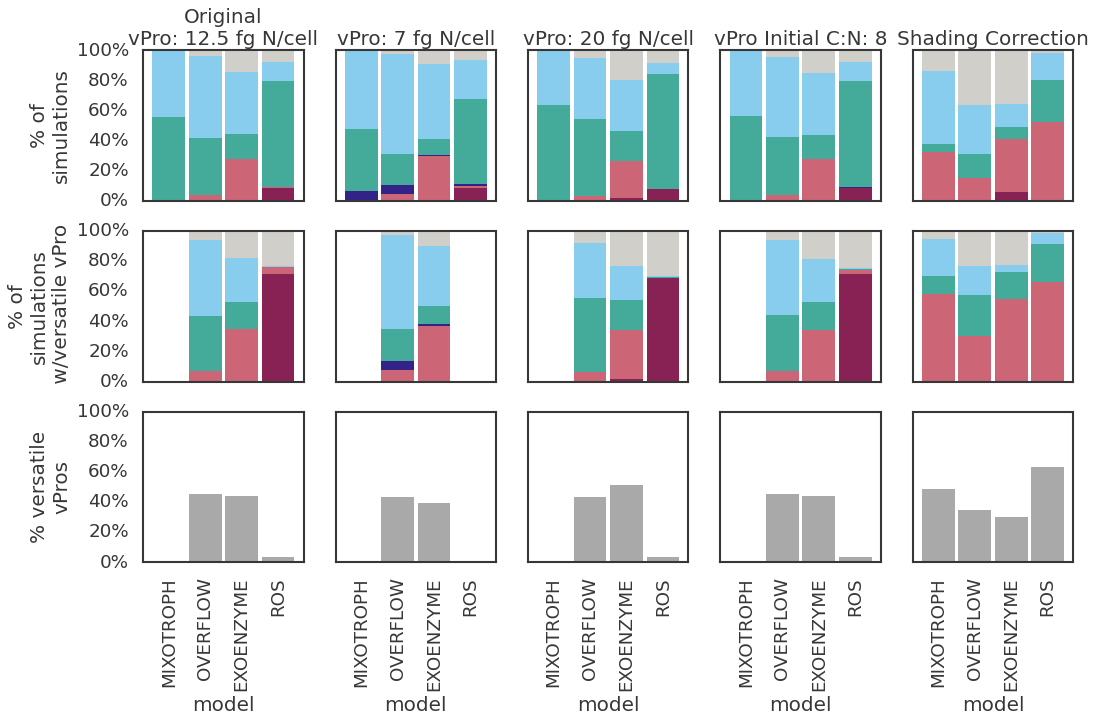

In [142]:

fig, axes = plt.subplots(3,len(sensitivity_order), figsize=(15,8), sharex=True , sharey=True)

# all simulations row
for cat, ax in zip(sensitivity_order, axes[0]):

    #cdf = count_df.copy()
    tdf = count_df.loc[count_df['Sensitivity'].isin([cat])]
    cdf = tdf[gorder].div(tdf[gorder].sum(axis=1), axis=0) * 100
    
    cdf.index=tdf.model 
    cdf = cdf.reindex(index=morder)
    cdf[gorder].plot(
        kind='bar', stacked=True, color=gpalette, width=0.9, #figsize=(3,3),
        rot=90, lw=0.01, 
        ylabel='% of\nsimulations', title=cat, legend=False,
        #title='Breakdown of Simulations per Phenotype',
        ax=ax
    )

# simulations of versatiles
for cat, ax in zip(sensitivity_order, axes[1]):

    #cdf = count_df.copy()
    tdf = count_ver_df.loc[count_ver_df['Sensitivity'].isin([cat])]
    cdf = tdf[gorder].div(tdf[gorder].sum(axis=1), axis=0) * 100
    
    cdf.index=tdf.model 
    cdf = cdf.reindex(index=morder)
    cdf[gorder].plot(
        kind='bar', stacked=True, color=gpalette, width=0.9, #figsize=(3,3),
        rot=90, lw=0.01, 
        ylabel='% of\nsimulations\n w/versatile vPro',  legend=False,
        #title='Breakdown of Simulations per Phenotype',
        ax=ax
    )

# % versatiles
for cat, ax in zip(sensitivity_order, axes[2]):

    #cdf = count_df.copy()
    cdf = vcount_df.loc[vcount_df['Sensitivity'].isin([cat])].copy()
    cdf['Versatile'] = cdf['Versatile']*100
    cdf.index=cdf.model 
    cdf = cdf.reindex(index=morder)
    cdf['Versatile'].plot(
        kind='bar', stacked=True, color='#A9A9A9', width=0.9, #figsize=(3,3),
        rot=90, lw=0.01, 
        ylabel='% versatile\nvPros',  legend=False,
        ax=ax
    )

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)

In [143]:
media_order


(['Original', 'DOC160', 'DOC2500', 'DIN800DOC160', 'DIN800', 'DIN800DOC2500'],)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'MIXOTROPH'),
  Text(1, 0, 'OVERFLOW'),
  Text(2, 0, 'EXOENZYME'),
  Text(3, 0, 'ROS')])

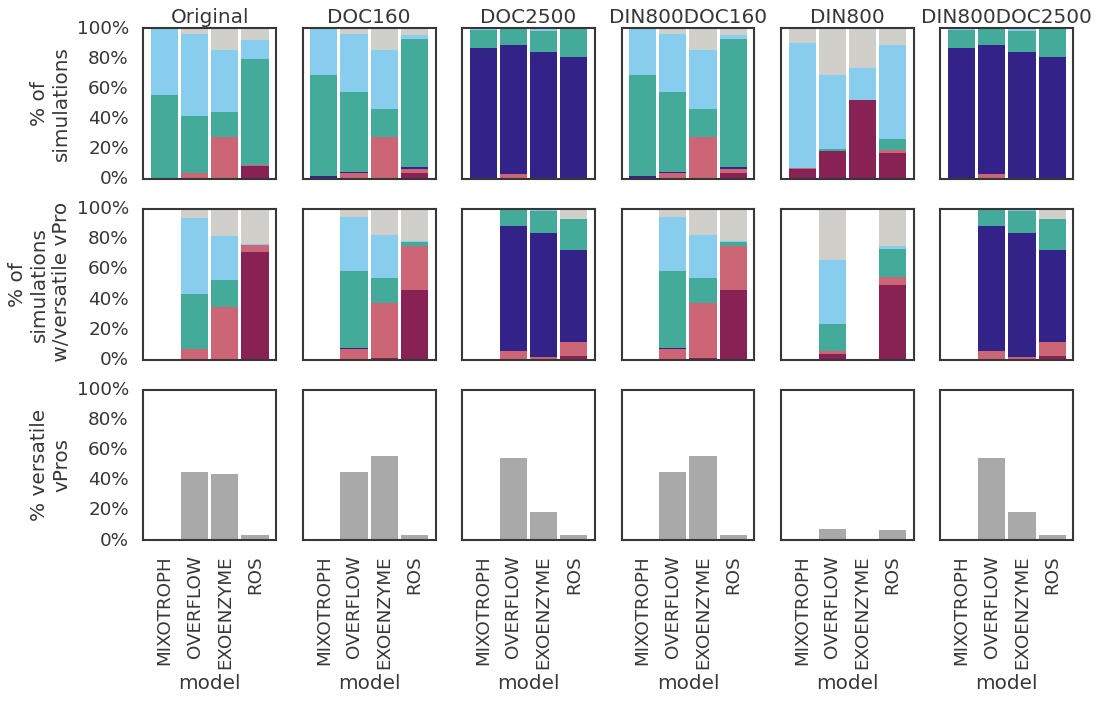

In [146]:

fig, axes = plt.subplots(3,len(media_order), figsize=(15,8), sharex=True , sharey=True)

# all simulations row
for cat, ax in zip(media_order, axes[0]):

    #cdf = count_df.copy()
    tdf = count_df.loc[count_df['Category'].isin([cat])]
    cdf = tdf[gorder].div(tdf[gorder].sum(axis=1), axis=0) * 100
    
    cdf.index=tdf.model 
    cdf = cdf.reindex(index=morder)
    cdf[gorder].plot(
        kind='bar', stacked=True, color=gpalette, width=0.9, #figsize=(3,3),
        rot=90, lw=0.01, 
        ylabel='% of\nsimulations', title=cat, legend=False,
        #title='Breakdown of Simulations per Phenotype',
        ax=ax
    )

# simulations of versatiles
for cat, ax in zip(media_order, axes[1]):

    #cdf = count_df.copy()
    tdf = count_ver_df.loc[count_ver_df['Category'].isin([cat])]
    cdf = tdf[gorder].div(tdf[gorder].sum(axis=1), axis=0) * 100
    
    cdf.index=tdf.model 
    cdf = cdf.reindex(index=morder)
    cdf[gorder].plot(
        kind='bar', stacked=True, color=gpalette, width=0.9, #figsize=(3,3),
        rot=90, lw=0.01, 
        ylabel='% of\nsimulations\n w/versatile vPro',  legend=False,
        #title='Breakdown of Simulations per Phenotype',
        ax=ax
    )

# % versatiles
for cat, ax in zip(media_order, axes[2]):

    #cdf = count_df.copy()
    cdf = vcount_df.loc[vcount_df['Category'].isin([cat])].copy()
    cdf['Versatile'] = cdf['Versatile']*100
    cdf.index=cdf.model 
    cdf = cdf.reindex(index=morder)
    cdf['Versatile'].plot(
        kind='bar', stacked=True, color='#A9A9A9', width=0.9, #figsize=(3,3),
        rot=90, lw=0.01, 
        ylabel='% versatile\nvPros',  legend=False,
        ax=ax
    )

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)

In [148]:
vpro_df.DOC.unique(), vpro_df.DIN.unique(), 
doc_order = [20,160,2500]
din_order = [100,800]


In [149]:
list(enumerate(din_order))

[(0, 100), (1, 800)]

(array([0, 1, 2, 3]),
 [Text(0, 0, 'MIXOTROPH'),
  Text(1, 0, 'OVERFLOW'),
  Text(2, 0, 'EXOENZYME'),
  Text(3, 0, 'ROS')])

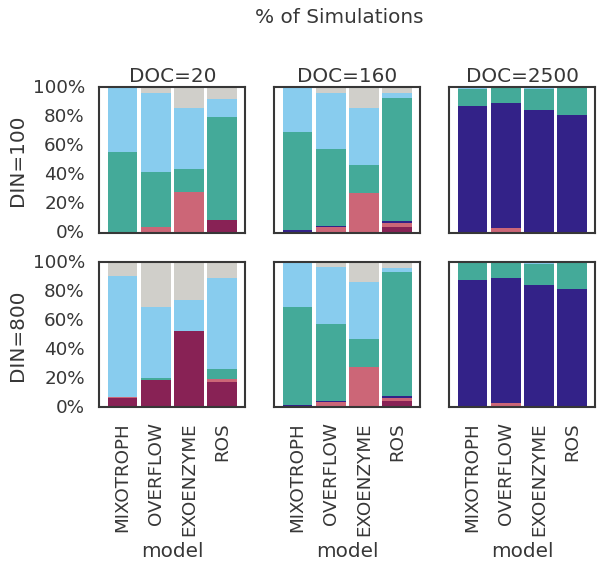

In [158]:

fig, axes = plt.subplots(len(din_order),len(doc_order), figsize=(8,5), sharex=True , sharey=True)

# all simulations row
                         
for row_idx, din_val  in enumerate(din_order):
    for doc_val, ax in zip(doc_order, axes[row_idx]):

        #cdf = count_df.copy()
        tdf = count_df.loc[count_df['DOC'].isin([doc_val]) & count_df['DIN'].isin([din_val])]
        cdf = tdf[gorder].div(tdf[gorder].sum(axis=1), axis=0) * 100
        
        cdf.index=tdf.model 
        cdf = cdf.reindex(index=morder)
        title = f'DOC={doc_val}'
        ylabel = f'DIN={din_val}'
        if row_idx != 0 :
            title=''
        if doc_val != doc_order[0]:
            ylabel=''
        cdf[gorder].plot(
            kind='bar', stacked=True, color=gpalette, width=0.9, #figsize=(3,3),
            rot=90, lw=0.01, 
            ylabel=ylabel, title=title, legend=False,
            #title='Breakdown of Simulations per Phenotype',
            ax=ax
        )
plt.suptitle('% of Simulations', y=1.1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)